# Happy or sad

In [3]:
import os #For easily traversing through the different directories
import cv2
import numpy as np

#for splitting the data into train/test sets
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split #For splitting the dataset

#Tesor flow keras cnn model
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense,Dropout,Flatten,Activation,Conv2D,MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop

#plot images
import matplotlib.pyplot as plt

In [4]:
folder_dir="D:\\img_class\\dataset" #Path of the base directory

In [5]:
data=[]
label=[]
SIZE=128

for folder in os.listdir(folder_dir): #listdir function lists the subfolters in the main folder
    for file in os.listdir(os.path.join(folder_dir,folder)):
        if file.endswith("jpg"): #makes sure we are using only img files
            label.append(folder) #for saving what all classes/types we are having
            img=cv2.imread(os.path.join(folder_dir,folder,file))
            #It is used to read an image from a file and load it into memory as a NumPy array.
            img_rgb=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
            im=cv2.resize(img_rgb,(SIZE,SIZE))
            data.append(im)
        else:
            continue

In [28]:
data[0] #Here the img is represented as a nd array

array([[[217, 215, 216],
        [219, 216, 215],
        [220, 216, 215],
        ...,
        [240, 238, 241],
        [240, 238, 241],
        [240, 238, 241]],

       [[217, 215, 216],
        [218, 214, 213],
        [220, 216, 215],
        ...,
        [241, 239, 242],
        [241, 239, 242],
        [240, 238, 241]],

       [[217, 215, 216],
        [218, 214, 213],
        [220, 216, 215],
        ...,
        [241, 239, 242],
        [241, 239, 242],
        [241, 239, 242]],

       ...,

       [[ 98, 143, 166],
        [123, 169, 190],
        [113, 149, 168],
        ...,
        [188, 196, 198],
        [186, 194, 196],
        [186, 196, 197]],

       [[ 75, 120, 141],
        [ 72, 109, 134],
        [106, 147, 169],
        ...,
        [185, 193, 195],
        [184, 192, 194],
        [184, 192, 194]],

       [[ 96, 141, 162],
        [ 62,  97, 122],
        [ 76, 112, 135],
        ...,
        [183, 191, 193],
        [181, 189, 191],
        [181, 189, 191]]

In [6]:
data_arr=np.array(data)
label_arr=np.array(label)
#converting the created lists to array

In [7]:
encoder=LabelEncoder()
#for making the textual label into numbers for identification
y=encoder.fit_transform(label_arr)
y=to_categorical(y,2) #becaue we have 2 different categories

# to categorical to convert the formed integers to one hot encoded vectors:
#This is a binary vector made for setting categorical data suitable for clssification algo

x=data_arr/255 #So the data array has information as an eight bit unsigned integer having 256 unique values 0-255
#by making it range from 0 to 1 we are making it into a b/w image
x[0] #same image decoded as an array in bw format

array([[[0.85098039, 0.84313725, 0.84705882],
        [0.85882353, 0.84705882, 0.84313725],
        [0.8627451 , 0.84705882, 0.84313725],
        ...,
        [0.94117647, 0.93333333, 0.94509804],
        [0.94117647, 0.93333333, 0.94509804],
        [0.94117647, 0.93333333, 0.94509804]],

       [[0.85098039, 0.84313725, 0.84705882],
        [0.85490196, 0.83921569, 0.83529412],
        [0.8627451 , 0.84705882, 0.84313725],
        ...,
        [0.94509804, 0.9372549 , 0.94901961],
        [0.94509804, 0.9372549 , 0.94901961],
        [0.94117647, 0.93333333, 0.94509804]],

       [[0.85098039, 0.84313725, 0.84705882],
        [0.85490196, 0.83921569, 0.83529412],
        [0.8627451 , 0.84705882, 0.84313725],
        ...,
        [0.94509804, 0.9372549 , 0.94901961],
        [0.94509804, 0.9372549 , 0.94901961],
        [0.94509804, 0.9372549 , 0.94901961]],

       ...,

       [[0.38431373, 0.56078431, 0.65098039],
        [0.48235294, 0.6627451 , 0.74509804],
        [0.44313725, 0

In [8]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [9]:
model=Sequential()#for creating sequential neural network model
model.add(Conv2D(filters=8,kernel_size=(3,3),padding="Same",activation="relu",input_shape=(SIZE,SIZE,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=128,kernel_size=(3,3),padding="Same",activation="relu"))
model.add(Conv2D(filters=128,kernel_size=(3,3),padding="Same",activation="relu"))
model.add(Conv2D(filters=128,kernel_size=(3,3),padding="Same",activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(64,activation="relu"))
model.add(Dropout(rate=0.5))
model.add(Dense(2, activation = "softmax")) #The first parameter is the number of classes

In [10]:
datagen = ImageDataGenerator(
        rotation_range=20,
        zoom_range = 0.20,
        width_shift_range=0.3,
        height_shift_range=0.3,
        horizontal_flip=True,
        vertical_flip=True)

datagen.fit(x_train) #applying data augmentation to the x train data

In [11]:
model.compile(optimizer=Adam(lr=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])
batch_size=3
epochs=16
history = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs,
                              validation_data = (x_test,y_test),
                              verbose = 1) 
#if verbose was 0, we would see no result, by verbose=1 we can see the complete result.

C:\Users\Biancaa. R\AppData\Local\Temp\ipykernel_10716\907817849.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),


Epoch 1/16
39/39 [==============================] - 13s 304ms/step - loss: 0.8716 - accuracy: 0.6293 - val_loss: 0.6759 - val_accuracy: 0.4828
Epoch 2/16
39/39 [==============================] - 13s 330ms/step - loss: 0.6470 - accuracy: 0.5948 - val_loss: 0.6483 - val_accuracy: 0.7586
Epoch 3/16
39/39 [==============================] - 17s 400ms/step - loss: 0.6897 - accuracy: 0.5517 - val_loss: 0.5749 - val_accuracy: 0.8621
Epoch 4/16
39/39 [==============================] - 11s 286ms/step - loss: 0.7336 - accuracy: 0.5517 - val_loss: 0.6224 - val_accuracy: 0.7586
Epoch 5/16
39/39 [==============================] - 12s 295ms/step - loss: 0.8078 - accuracy: 0.6207 - val_loss: 0.6601 - val_accuracy: 0.5862
Epoch 6/16
39/39 [==============================] - 17s 448ms/step - loss: 0.6254 - accuracy: 0.6724 - val_loss: 0.6893 - val_accuracy: 0.8276
Epoch 7/16
39/39 [==============================] - 24s 620ms/step - loss: 0.6212 - accuracy: 0.7414 - val_loss: 0.6161 - val_accuracy: 0.6552

1/1 [==============================] - 0s 351ms/step


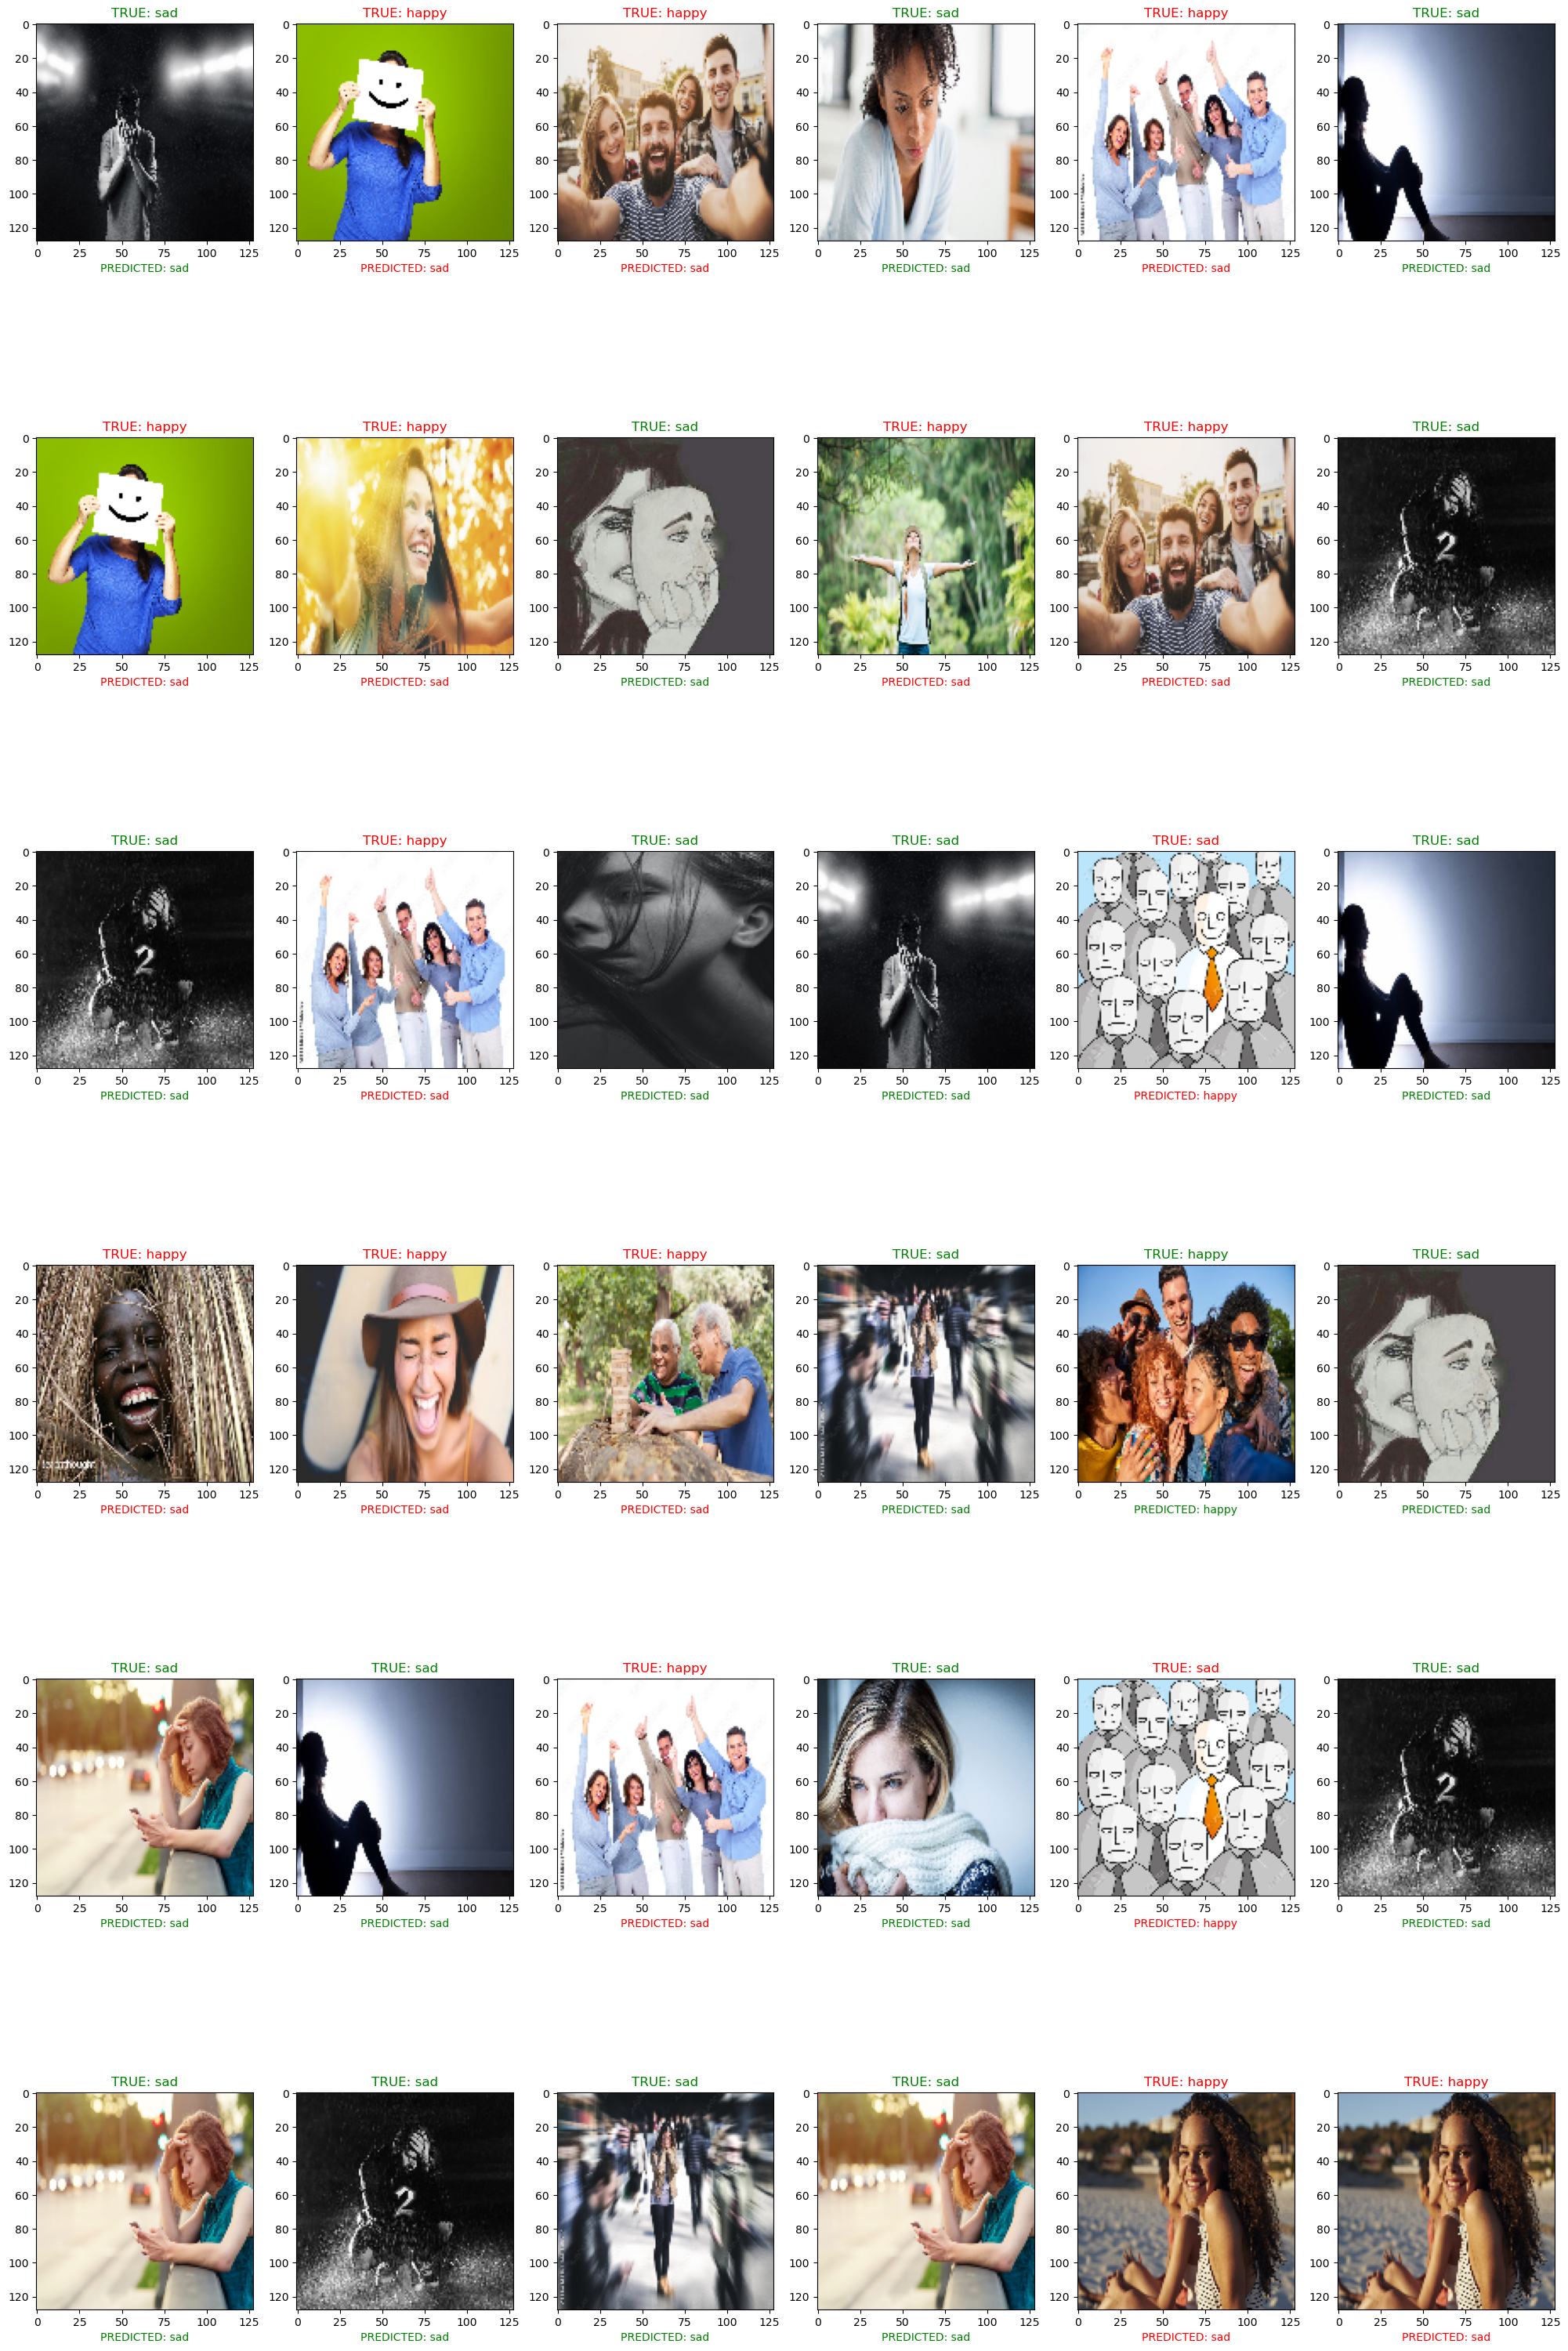

In [12]:
categories = np.sort(os.listdir(folder_dir))
fig, ax = plt.subplots(6,6, figsize=(25, 40))

for i in range(6):
    for j in range(6):
        k = int(np.random.random_sample() * len(x_test))
        if(categories[np.argmax(y_test[k])] == categories[np.argmax(model.predict(x_test)[k])]):
            ax[i,j].set_title("TRUE: " + categories[np.argmax(y_test[k])], color='green')
            ax[i,j].set_xlabel("PREDICTED: " + categories[np.argmax(model.predict(x_test)[k])], color='green')
            ax[i,j].imshow(np.array(x_test)[k].reshape(SIZE, SIZE, 3), cmap='gray')
        else:
            ax[i,j].set_title("TRUE: " + categories[np.argmax(y_test[k])], color='red')
            ax[i,j].set_xlabel("PREDICTED: " + categories[np.argmax(model.predict(x_test)[k])], color='red')
            ax[i,j].imshow(np.array(x_test)[k].reshape(SIZE, SIZE, 3), cmap='gray')

1/1 [==============================] - 0s 44ms/step
1
happy


(-0.5, 1399.5, 932.5, -0.5)

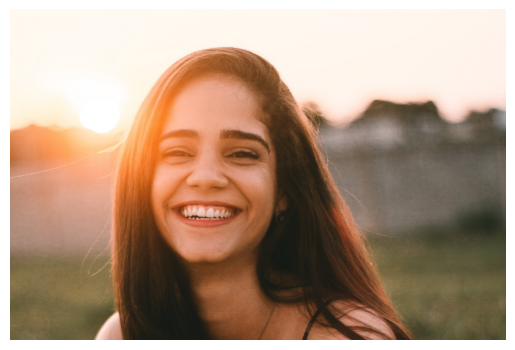

In [30]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
#from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import cv2
import matplotlib.pyplot as plt

# Step 1: Load and preprocess the image
img_path = "D:\\img_class\\dataset\happy\\1HEoLBLidT2u4mhJ0oiDgig.png"  # Replace with the path to your image
img = image.load_img(img_path, target_size=(128,128))  # Resize to match model input size
img_array = image.img_to_array(img)
img_array = tf.expand_dims(img_array, axis=0)  # Add batch dimension
img_preprocessed = preprocess_input(img_array)  # Normalize pixel values
#img_preprocessed=img_preprocessed.reshape(1,-1)

# Step 3: Make predictions
predictions = model.predict(img_preprocessed)
print(int(predictions[0][0]))

print(label_arr[(int(predictions[0][0]))])#for getting only the first prediction with highest prob
#decoded_predictions = decode_predictions(predictions, top=5)[0]  # Decode predictions I get error not sure why

# Print the top predicted labels and their probabilities
#for label, description, score in decoded_predictions:
    #print(f'{description}: {score:.2f}')

img=cv2.imread("D:\\img_class\\dataset\happy\\1HEoLBLidT2u4mhJ0oiDgig.png")
# plt.imshow(img) If directly printed the image has a blusish tint as opencv is based on bgr
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.axis("off") #if we dont want axis depiction